In [19]:
from preprocessing_tools import *
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [2]:
tok=load_tokens("preprocessed_total_tweets.txt")

tw_dict_en=Dictionary(tok)
corpus=[tw_dict_en.doc2bow(doc)for doc in tok]

In [3]:
coherence = []
for k in range(5,25):
    print('Round: '+str(k))
    ldamodel = LdaModel(corpus, num_topics=k, \
               id2word = tw_dict_en, passes=40,\
               iterations=100, eval_every = None)
    
    cm = CoherenceModel(\
         model=ldamodel, texts=tok,\
         dictionary=tw_dict_en, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24


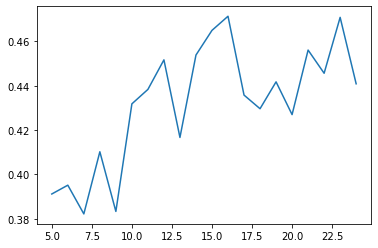

In [6]:
plt.plot(*zip(*coherence))

In [16]:
ldamodel = LdaModel(corpus, num_topics = 10,id2word=tw_dict_en, passes=15)
ldamodel.save("twitter.model")

## LDA visualization

In [21]:
tok=load_tokens("preprocessed_total_tweets.txt")
tw_dict_en=Dictionary(tok)
corpus=[tw_dict_en.doc2bow(doc)for doc in tok]
ldamodel= LdaModel.load("twitter.model")
vis_data=gensimvis.prepare(ldamodel,corpus,tw_dict_en)

C:\Users\mddaf\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [22]:
pyLDAvis.display(vis_data)